<a href="https://colab.research.google.com/github/Cstan1987stat/health-survey-cluster-analysis/blob/main/inital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Loading in the adult22 csv file.
df <- read.csv("https://raw.githubusercontent.com/Cstan1987stat/health-survey-cluster-analysis/refs/heads/main/adult22_filtered.csv")

In [32]:
head(df)

,AGEP_A,SEX_A,CANEV_A,CHDEV_A,DEPEV_A,SMKEV_A,EDUCP_A,REGION,ANXFREQ_A,HEIGHTTC_A,WEIGHTLBTC_A,SLPHOURS_A,PA18_05R_A,DRK12MYR_A
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,64,1,1,1,2,1,8,3,4,74,235,8,3,108
2,37,2,2,2,2,2,8,3,3,69,218,9,3,0
3,72,2,2,2,2,2,5,3,5,64,240,8,1,12
4,84,2,2,2,2,2,6,3,4,66,183,8,1,52
5,31,2,2,2,2,1,8,3,3,69,156,8,4,52
6,81,2,1,2,2,2,4,3,4,68,170,5,1,0


In [33]:
library(dplyr)

## Exploratory Data Analysis

No missing values

### Univariate Analysis

##### Numerical Variables

In [38]:
# Creating a custom function to calculate the summary statistics for the given features.
summ_stats <- function(data) {
  # Creating empty list to hold the values.
  summary_list <- list()

  # Iterating through each column.
  for (col in names(data)) {
      # For the given column, calculate the summary stats.
      summary_list[[col]] <- c(
        Min = min(data[[col]]),
        Q = quantile(data[[col]], .25),
        Mean = mean(data[[col]]),
        Median = median(data[[col]]),
        Q = quantile(data[[col]], .75),
        Max = max(data[[col]]),
        SD = sd(data[[col]])
      )
  }

  # Create the dataframe based on what is in the summary_list
  summary_df <- as.data.frame(do.call(rbind, summary_list))
  # Transpose the data frame
  t(summary_df)
}

In [39]:
# Defining vector of the numeric column names
num_cols <- c("Age", "Height", "Weight", "Sleep_hours", "Alcohol_drink_12m")
# Selecting the numeric columns from df, and computing the summary statistics.
summ_stats(df[, num_cols])

,Age,Height,Weight,Sleep_hours,Alcohol_drink_12m
Min,18.00000,59.000000,100.00000,1.000000,0.00000
Q.25%,37.00000,64.000000,150.00000,6.000000,2.00000
Mean,52.13550,66.890870,179.32051,7.088601,67.67669
Median,54.00000,67.000000,175.00000,7.000000,24.00000
Q.75%,67.00000,70.000000,204.00000,8.000000,104.00000
Max,84.00000,76.000000,299.00000,24.000000,365.00000
SD,17.37174,3.871204,39.55778,1.350510,97.45111


* **Age** : The average age is 52.14, with a median of 54 and a standard deviation of 17.38.
* **Height** : The average height is 66.89, with a median of 67 and a standard deviation of 3.87.
* **Weight** : The average weight is 179.32, with a median of 175 and a standard deviation of 39.56.
* **Sleep_hours** : The average hours of sleep is 7.09, with a median of 7 and a standard deviation of 1.35.
* **Alcohol_drink_12m** : The average drinks in the past 12 months is 67.68, with a median of 24 and a standard deviation of 97.45.

In [40]:
install.packages("gridExtra")
library(ggplot2)
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




###### Density Plots

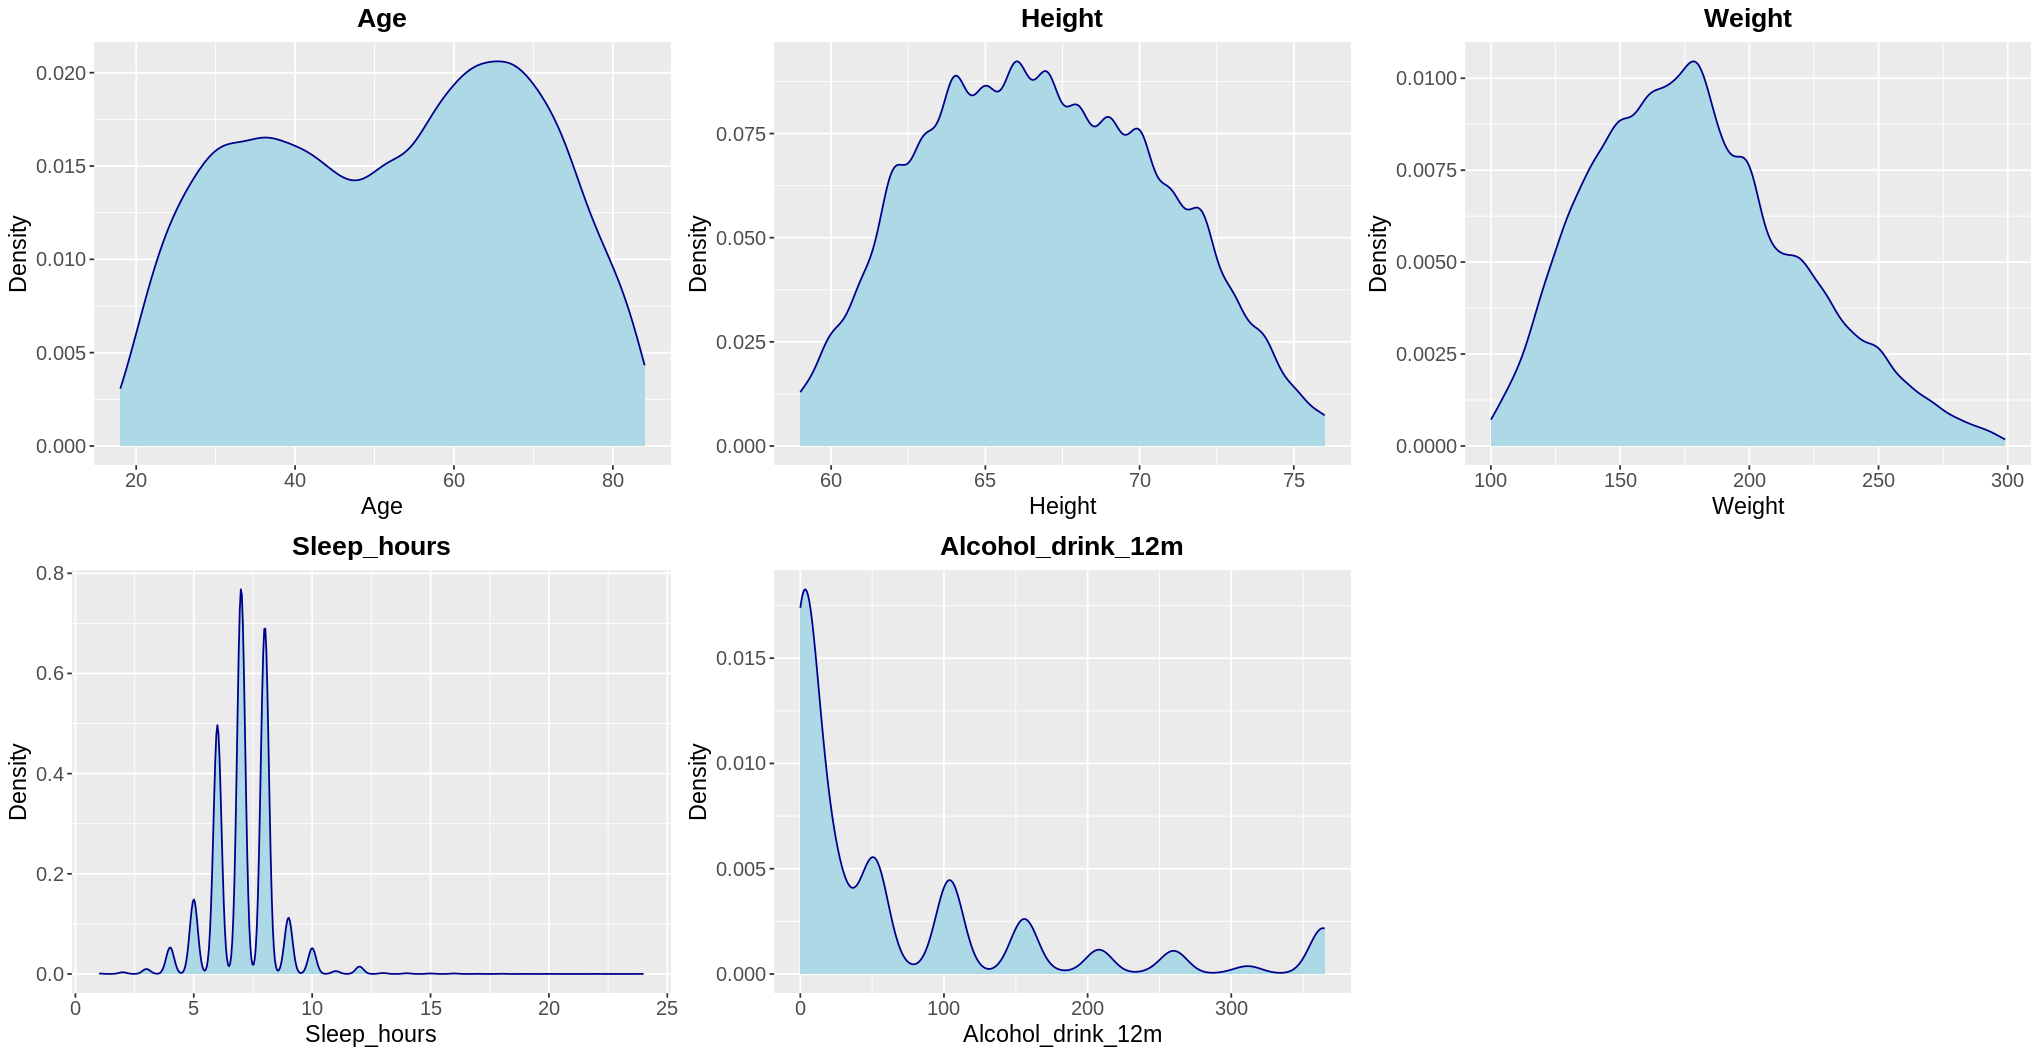

In [41]:
# Set custom plot dimensions
options(repr.plot.width = 17, repr.plot.height = 8.8)

# Function to create density plot for a given column
plot_density <- function(data, col_name) {
  ggplot(data, aes(x = .data[[col_name]])) +   # Dynamically reference column names

    # Add density plot with custom colors
    geom_density(fill = "lightblue", color = "darkblue") +
    # Add title and axis labels
    labs(title = col_name, x = col_name, y = "Density") +
    # Adjusting the text appearance
    theme(axis.text.x = element_text(size=12),
      axis.text.y = element_text(size=12),
      axis.title.x = element_text(size=14),
      axis.title.y = element_text(size=14),
      plot.title = element_text(size=16, hjust = 0.5, face='bold'),
      plot.subtitle = element_text(size=14, hjust=0.5))
}

# Create a list of density plots for each numeric column
plots <- lapply(names(df[, num_cols]), function(col_name) {
  plot_density(df[, num_cols], col_name)
})

# Arranging all the plots in a grid layout with 3 columns
grid.arrange(grobs = plots, ncol = 3)

* **Age** - The distribution of Age is bimodal, with a smaller peak near 35 years old and the larger peak occuring around 60-70 years old. The dominance of the older individuals indicate the dataset's sample adult population has a higher proportion of individuals that are older compared to younger people.
* **Height** - The distribution of Height is approximately unimodal with some flucuations, with the largest peak occuring around 66 inches. The slight right skew indicates that the dataset includes a greater number of shorter individuals compared to taller ones, though the skew is mild.
* **Weight** - The distribution of Weight is unimodal, with the largest peak occuring between 150 and 200 pounds. The right skew suggest a higher proportion of individuals weight less compared to those with higher weights.
* **Sleep_hours** - he distribution of Sleep Hours is multimodal, with the largest peak at around 7 hours, followed by smaller peaks at 8 hours and 6 hours. The presence of extreme value such as 24 hours raises questions about data quality and or potential reporting errors.
* **Alcohol_drink_12m** - The distribution of Alcohol Consumption is multimodal, with the largest peak around 0 drinks, followed by smaller peaks at 50 and 100 drinks. This indicates a majority of individuals drink infrequently, while a smaller portion consume alcohol more regularly, potentially reflecting social or lifestyle differences.

###### Boxplots


What is a boxplot?
* The middle line inside of the box (or colored rectangle) is the median (Q2), which splits the data into two equal halves: 50% of the data is below the median, and 50% is above it.
* The left edge of the box represents the 25th percentile (Q1), meaning 25% of the data is below this value, and 75% is above it.
* The right edge of the box represents the 75th percentile (Q3), meaning 75% of the data is below this value, and 25% is above it.
* The box itself represents the interquartile range (iqr = Q3 - Q1), which contains the middle 50% of the data.
* The horizontal lines (whiskers) extend from the edges of the box to the most extreme non-outlier value within a specific range:
 - The upper (right) whisker extends to the largest value that is less than or equal to (Q3 + 1.5 * iqr).
 - The lower (left) whisker extends to the smallest vlaues that is greater than or equal to (Q1 - 1.5 * iqr).
* Any data points outside this range are considered outliers, and will be represents by individual points.

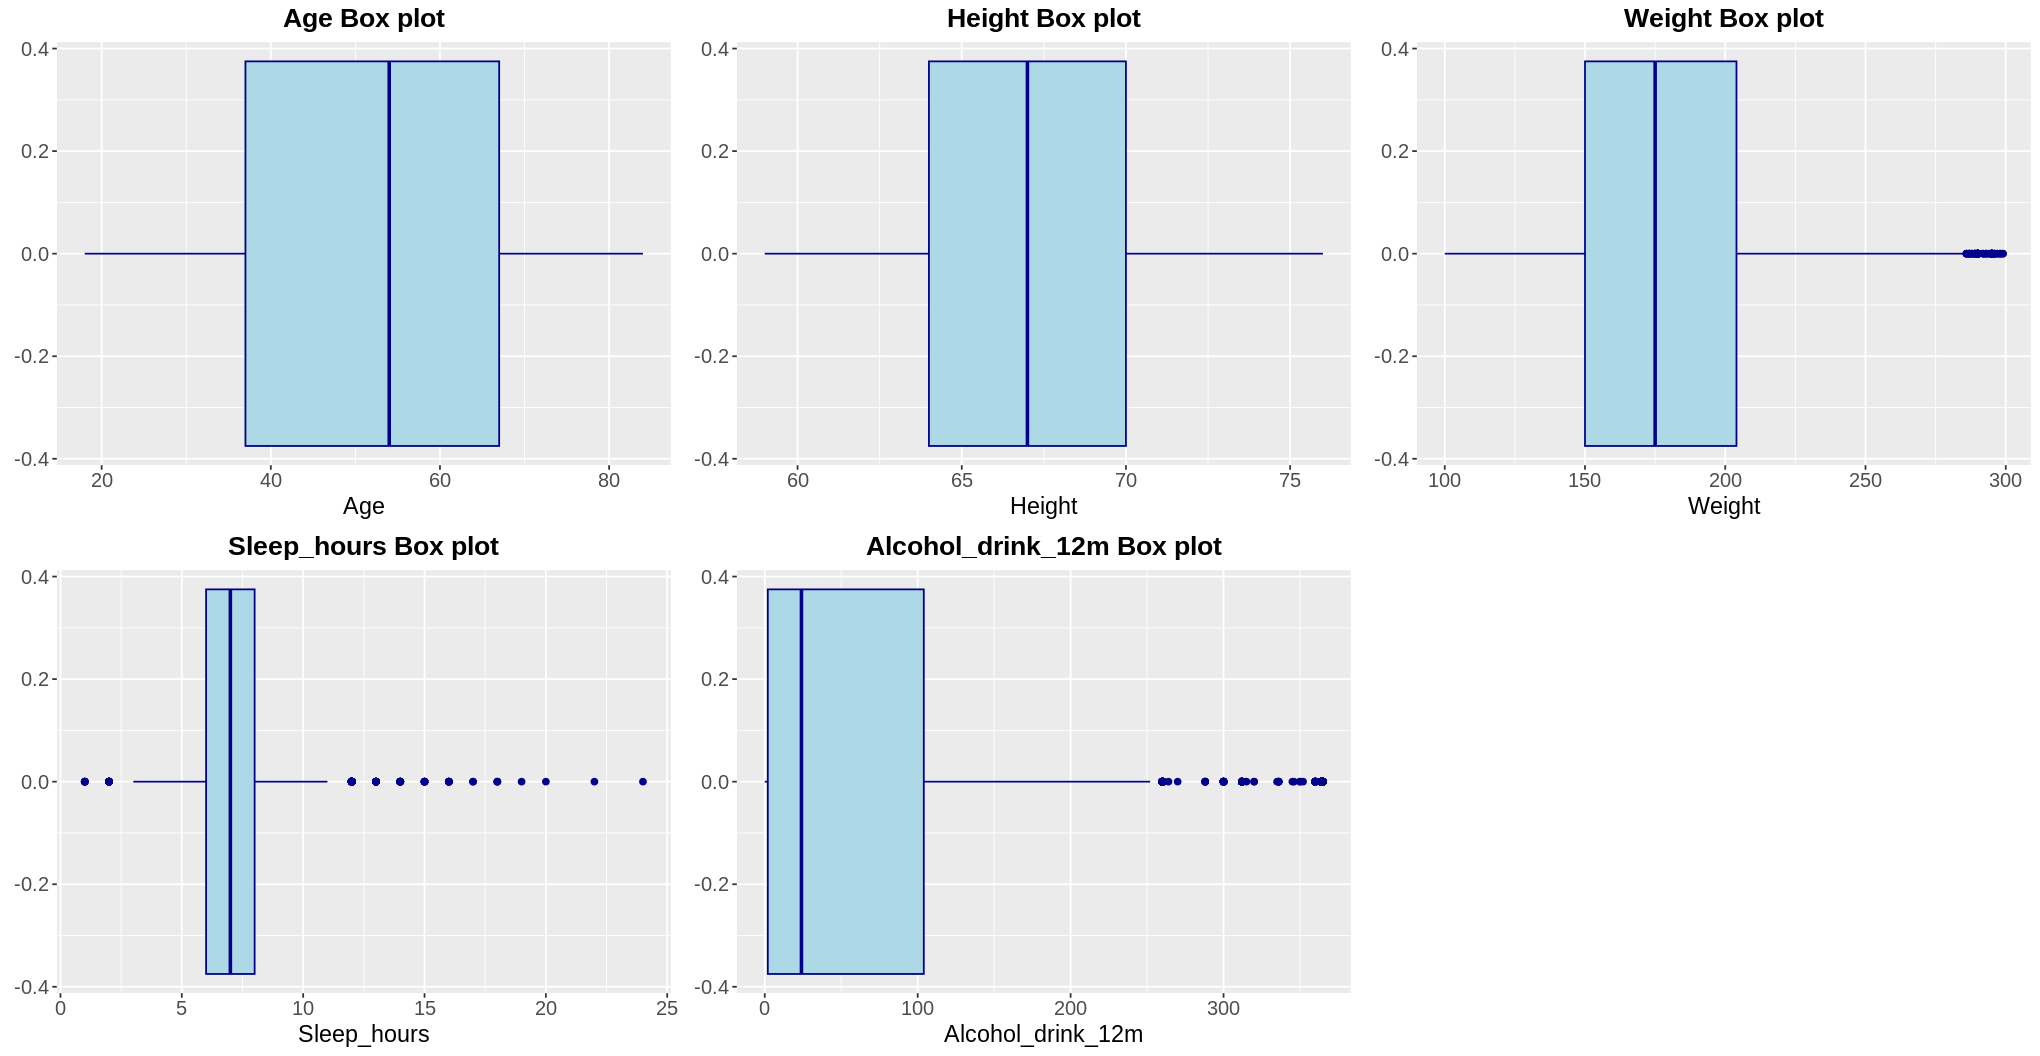

In [42]:
# Function to create boxplot for a given column
plot_boxplot <- function(data, col_name) {
  ggplot(data, aes(x = .data[[col_name]])) +   # Dynamically reference column name

    # Add boxplot with custom colors
    geom_boxplot(fill = "lightblue", color = "darkblue") +
    # Add title and x-axis label
    labs(title = paste0(col_name, " Box plot"), x = col_name) +
    # Adjusting the text apperance.
    theme(axis.text.x = element_text(size=12),
      axis.text.y = element_text(size=12),
      axis.title.x = element_text(size=14),
      axis.title.y = element_text(size=14),
      plot.title = element_text(size=16, hjust = 0.5, face='bold'),
      plot.subtitle = element_text(size=14, hjust=0.5))
}

# Create a list of boxplots for each numeric column
plots <- lapply(names(df[, num_cols]), function(col_name) {
  plot_boxplot(df[, num_cols], col_name)
})

# Arranging all the plots in a grid layout with 3 columns
grid.arrange(grobs = plots, ncol = 3)

* **Age** - The boxplot for Age shows a slight left-skewed distribution, with the median closer to Q3. This suggests the sampled adult population is slightly older overall. The absence of outliers indicates that age values are well-contained within the expected range.

* **Height** - The boxplot for Height exhibits an approximately symmetric distibribution, with the median fairly centered within the interquartile range (iqr). the absence of outliers suggests consistent heights across the sampled adults, with no extreme values.

* **Weight** -  The boxplot for Weight shows a slight right-skewed distribution, with the median closer to Q1. The cluster of outliers above the upper whisker indicates a group of individuals with significantly higher weights compared to the norm, which contributes to the skew.

* **Sleep_hours** - The boxplot for Sleep Hours is relatively symmetric, with the median centered within the iqr. However, the presence of outliers below the lower and upper whiskers creates the impression of a right-skewed distribution. Extreme values, such as those reporting 24 hours of sleep, are a little suspect (potentially indicating entering in data entry error or the sampled adult misunderstanding the question).

* **Alcohol_drink_12m** - The boxplot for Alcohol Consumption shows a right-skewed distribution, with the median closer to Q1. This suggest that the majority of individuals consume alcohol infrequently. The presence of outliers above the upper whisker points to a subgroup of individuals who drink heavily.

##### Categorical Variables

In [43]:
cat_cols <- c('Sex', 'Cancer', 'Coronary_heart_disease', 'Depression', 'Smoked_100_cig',
              'Education', 'Region', 'Anxiety','Aerobic/Strength')
df_copy <- df

df_copy$Sex <- factor(df_copy$Sex, labels=c('Male', 'Female'))
df_copy$Cancer <- factor(df_copy$Cancer, labels=c('Yes','No'))
df_copy$Coronary_heart_disease <- factor(df_copy$Coronary_heart_disease, labels = c('Yes', 'No'))
df_copy$Depression <- factor(df_copy$Depression, labels = c('Yes','No'))
df_copy$Smoked_100_cig <- factor(df_copy$Smoked_100_cig, labels = c('Yes', 'No'))
df_copy$Education <- factor(df_copy$Education, labels = c('1-11', '12th', 'GED', 'High School', 'Some College', 'Assoc Tech', 'Assoc Acad', 'Bach', 'Mast', 'Prof'))
df_copy$Region <- factor(df_copy$Region, labels = c('Northeast', 'Midwest', 'South', 'West'))
df_copy$Anxiety <- factor(df_copy$Anxiety, labels = c('Daily', 'Weekly', 'Monthly', 'Few times Y', 'Never'))
df_copy$`Aerobic/Strength` <- factor(df_copy$`Aerobic/Strength`, labels = c('Neither', 'Strength', 'Aerobic', 'Both'))

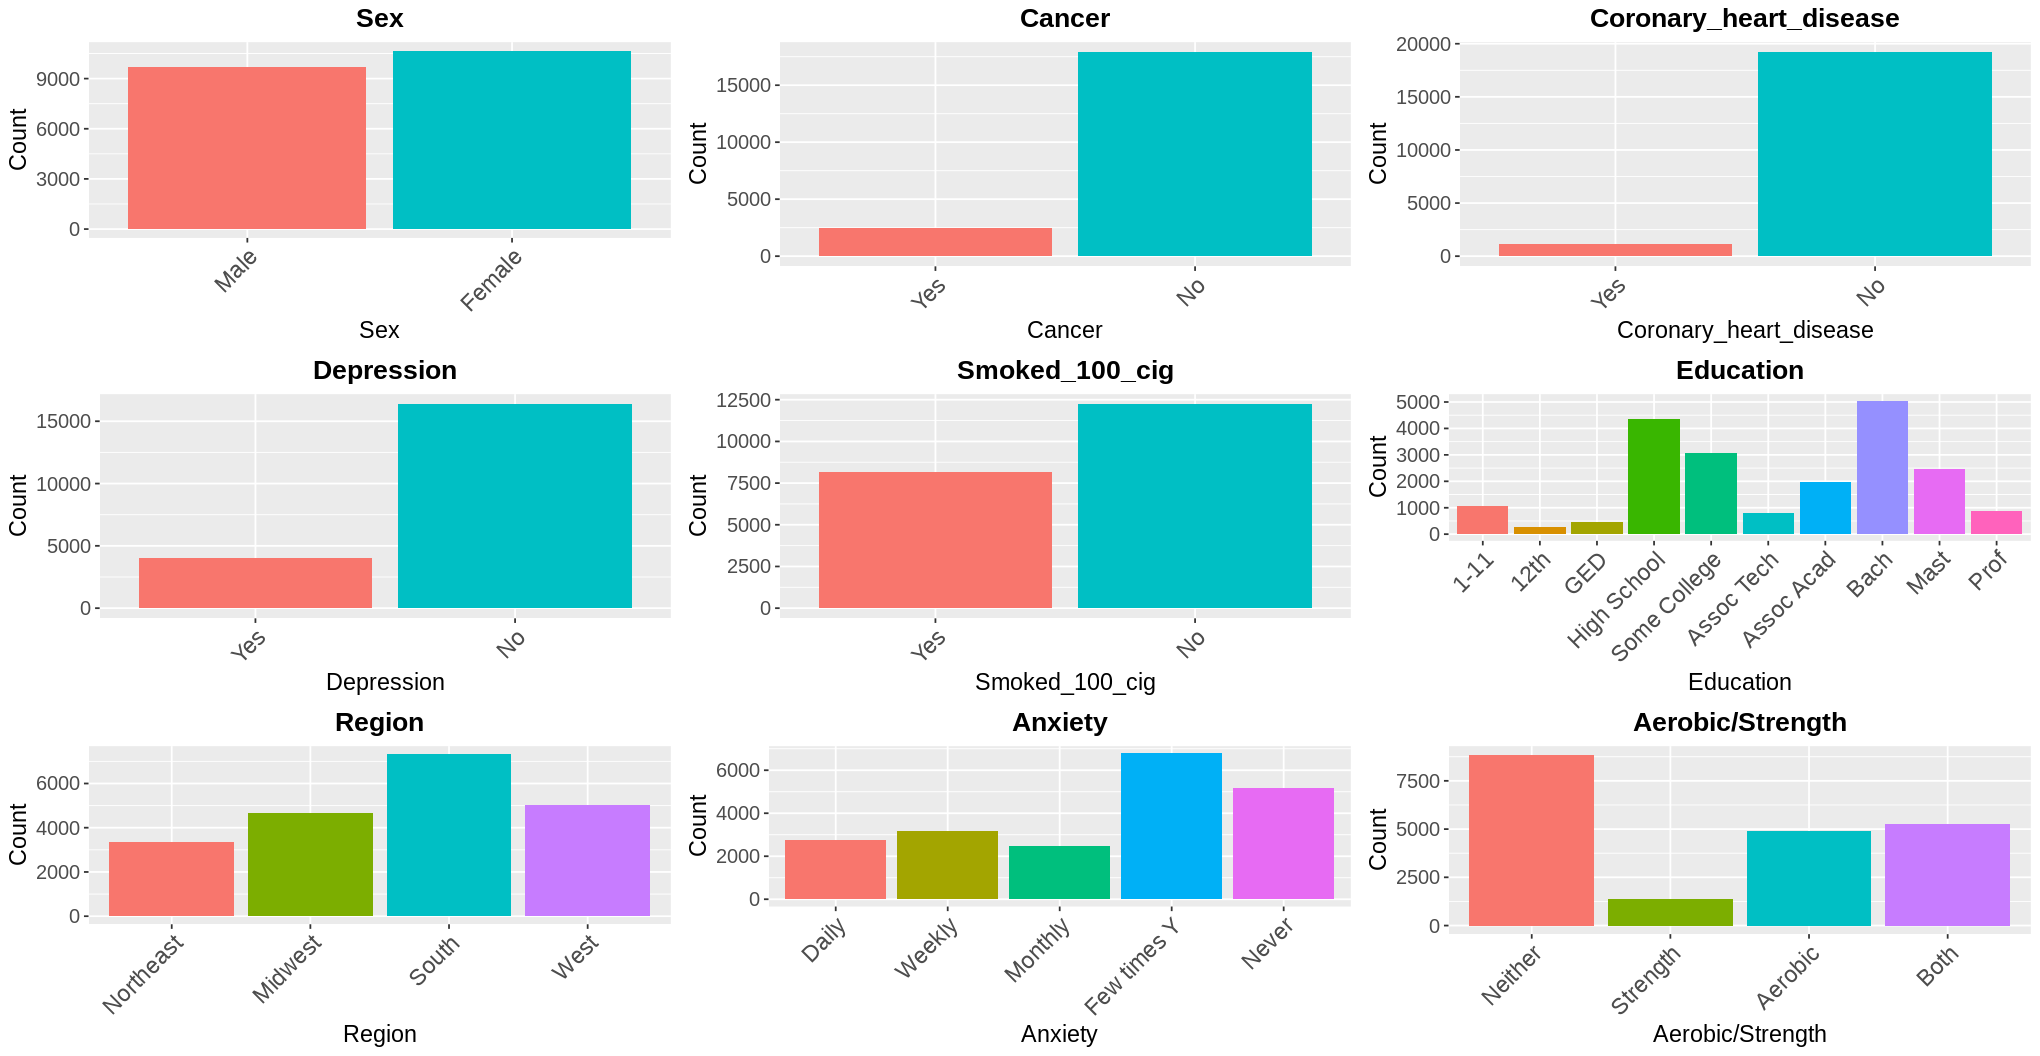

In [44]:
# Function to create bar plots
plot_bar <- function(data, col_name) {
  ggplot(data, aes(x = .data[[col_name]], fill = .data[[col_name]])) +
    geom_bar() +
    labs(title = col_name, x = col_name, y = "Count") +
    theme(axis.text.x = element_text(size=14, angle = 45, hjust = 1),
          axis.text.y = element_text(size=12),
          axis.title.x = element_text(size=14),
          axis.title.y = element_text(size=14),
          plot.title = element_text(size=16, hjust = 0.5, face='bold'),
          plot.subtitle = element_text(size=14, hjust=0.5),
          legend.position = "none")
}

# Create a list of plots
plots <- lapply(names(df_copy[,cat_cols]), function(col_name) {
  plot_bar(df_copy[,cat_cols], col_name)
})

# Arrange all plots in a grid layout with 3 columns
grid.arrange(grobs = plots, ncol = 3)

* **Sex** - More females than males.
* **Cancer** - More people who've not been told they have cancer compared to those who've been told they have it.
* **Coronary_heart_disease** - More people who've not been told they have coronary heart disease compared to those who've been told they have it.
* **Depression** - More people who've not been told they have depression compared to those who've been told they have it.
* **Smoked_100_cig** - More people who've not smoked 100 cigarettes compared to those who have.
* **Education** - Most common education was a Bachelor's degree with 12th grade (no diploma) being the least common.
* **Region** - Most common region was the South region while the Northeast was the least common.
* **Anxiety** - Most common was a few times a year while the least common seems to be monthly.
* **Aerobic/Strength** - Most common was neither while the least common was meeting the the strength guidline only.

In [45]:
for (col in names(df_copy[, sapply(df_copy, is.factor)])) {
  proportions <- prop.table(table(df_copy[[col]]))
  cat(col, ":\n")
  print(round(proportions * 100, 2))
  cat("\n")
}

Sex :

  Male Female 
  47.7   52.3 

Cancer :

  Yes    No 
12.17 87.83 

Coronary_heart_disease :

  Yes    No 
 5.74 94.26 

Depression :

  Yes    No 
19.66 80.34 

Smoked_100_cig :

  Yes    No 
39.96 60.04 

Education :

        1-11         12th          GED  High School Some College   Assoc Tech 
        5.22         1.42         2.25        21.33        15.05         3.91 
  Assoc Acad         Bach         Mast         Prof 
        9.67        24.78        12.07         4.30 

Region :

Northeast   Midwest     South      West 
    16.52     22.83     35.97     24.68 

Anxiety :

      Daily      Weekly     Monthly Few times Y       Never 
      13.54       15.58       12.22       33.31       25.35 

Aerobic/Strength :

 Neither Strength  Aerobic     Both 
   43.49     6.64    24.06    25.81 



* **Sex** - 52.3% of the sampled adults are female while 47.7% are male.
* **Cancer** - 87.83% of the sampled adults haven't been told they have cancer while 12.17% have been told they have cancer.
* **Coronary_heart_disease** - 94.26% of the sampled adults haven't been told they have coronary heart disease while 5.74% have been told they have coronary heart disease.
* **Depression** - 80.34% of the sampled adults haven't been told they have depression while 19.66% have been told they have depression.
* **Smoked_100_cig** - 60.04% of the sampled adults haven't smoked 100 cigarettes while 39.96% have smoked 100 cigarettes.
* **Education** - 24.78% of the sampled adults have a Bachelor's degree, 21.33% have a High School diploma, 15.05% have  completed some college, 12.07% have a Master's degree, 9.67% have an Academic Associate's degree, 5.22% have completed 1-11th grade of school, 4.3% have completed a professional degree (PhD, Doctorate, etc), 3.91% have completed a Technical Associate's degree, 2.25% have a General Education Degree, and 1.42% have 12th grade but no diploma.  
* **Region** - 35.97% of the sampled adults are from the South, 24.68% are from the West, 22.83% are from the Midwest, and 16.52% are from the Northeast.
* **Anxiety** - 33.31% of the sampled adults have felt anxious (or worried/nervous) a few times a year, 25.35% never did, 15.58% felt it weekly, 13.54% felt it daily, and 12.22 felt it monthly.
* **Aerobic/Strength** - 43.49% of the sampled adults meet neither guidelines, 25.81% meet both the strength and aerobic guidelines, 24.06% meet only the aerobic guideline, and 6.64% meet only the strength guidelines.

### Bivariate Analysis

#### Numerical

In [47]:
install.packages("reshape2")
library(reshape2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




##### Correlation heatmap

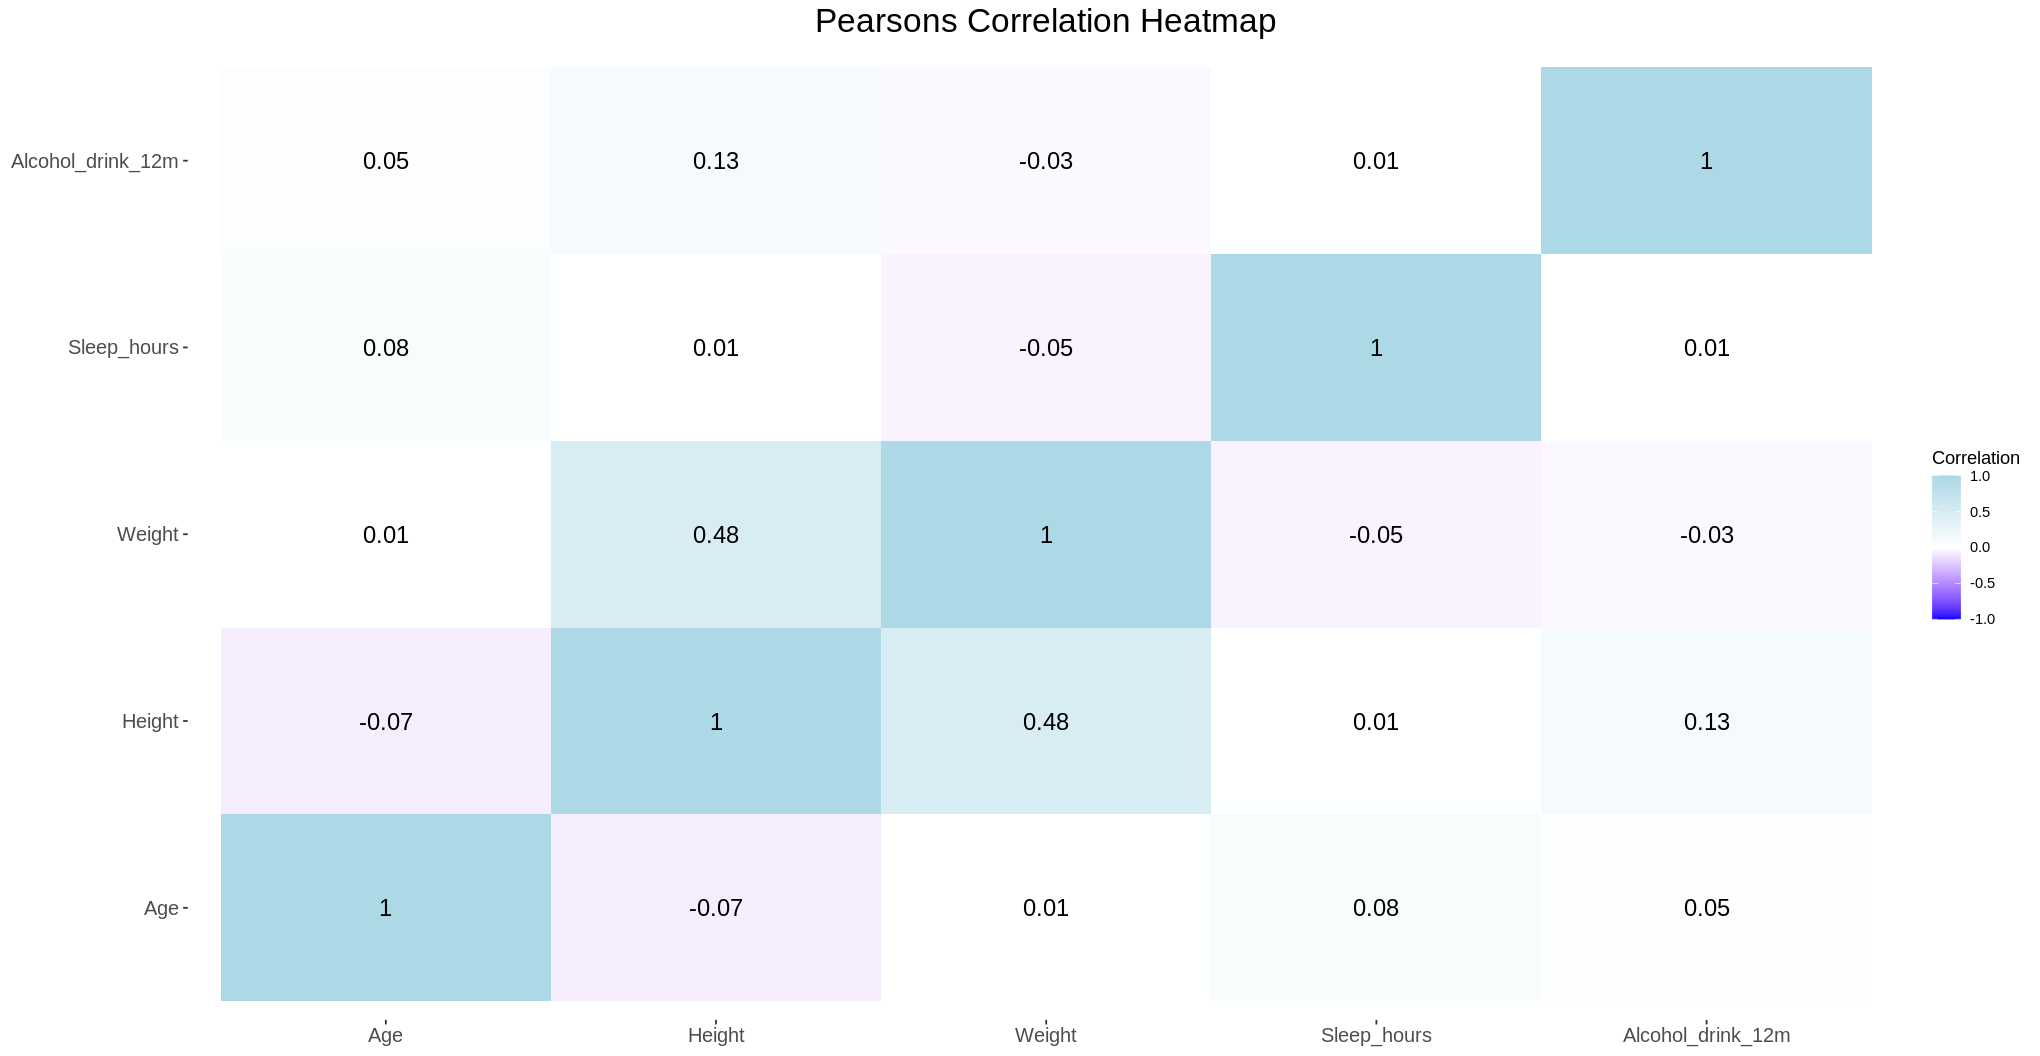

In [48]:
# Much of the code is based off https://www.statology.org/correlation-heatmap-in-r/.
corr <- round(cor(df[,num_cols]),2)
melt_corr <- melt(corr)

# Increase the size of axis labels
ggplot(data = melt_corr, aes(x=Var1, y=Var2, fill=value)) +
  geom_tile() +
  labs(title = 'Pearsons Correlation Heatmap') +
  geom_text(aes(Var2, Var1, label = value), size = 5) +
  scale_fill_gradient2(low = "blue", high = "lightblue",
                       limit = c(-1,1), name="Correlation") +
  theme(axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        panel.background = element_blank(),
        axis.text.x = element_text(size = 12),  # Adjust size as needed
        axis.text.y = element_text(size = 12),
        plot.title = element_text(size=20, hjust=0.5)
        )  # Adjust size as needed

Correlation coefficients that are positive indicate that as one variable increases, the other variable tends to increase. Correlation coefficients that are negative indicate that as one variable increases, the other variable tends to decrease. Correlation coefficients of 0 indicate that there isn't a linear relationship between the two variables, though there could still be a non-linear relationship, such as a quadratic one. The closer the positive correlation is to 1, or the negative correlation is to -1, the stronger the relationship between the two variables.
**Correlation doesn't mean causation however!!!**

* The strongest correlation occurs between Weight and Height with a 0.48 coefficient (still a mild correlation). This indicates that in our data, as height increases, weight tends to increase as well.

* The next strongest correlation occurs between Height and Alcohol consumption, with a 0.13 coefficient.

* Weight and height, sleep and height, and alcohol and sleep all had slightly positive coefficients, indicating that as one variable increases, the other might slightly increase. I found it surprising that an increase in alcohol consumption could lead to a slight increase in sleep based on the data.

* Variables with a slight negative correlation were sleep and weight, alcohol and weight, and age and height. This means that as one variable increases, the other may slightly decrease. Interestingly, our data suggests that increasing weight could lead to a decrease in the number of alcohol drinks consumed in the past 12 months. In theory, the number of drinks to reach the desired effects would need to increase if their weight increased.

##### Scatterplots

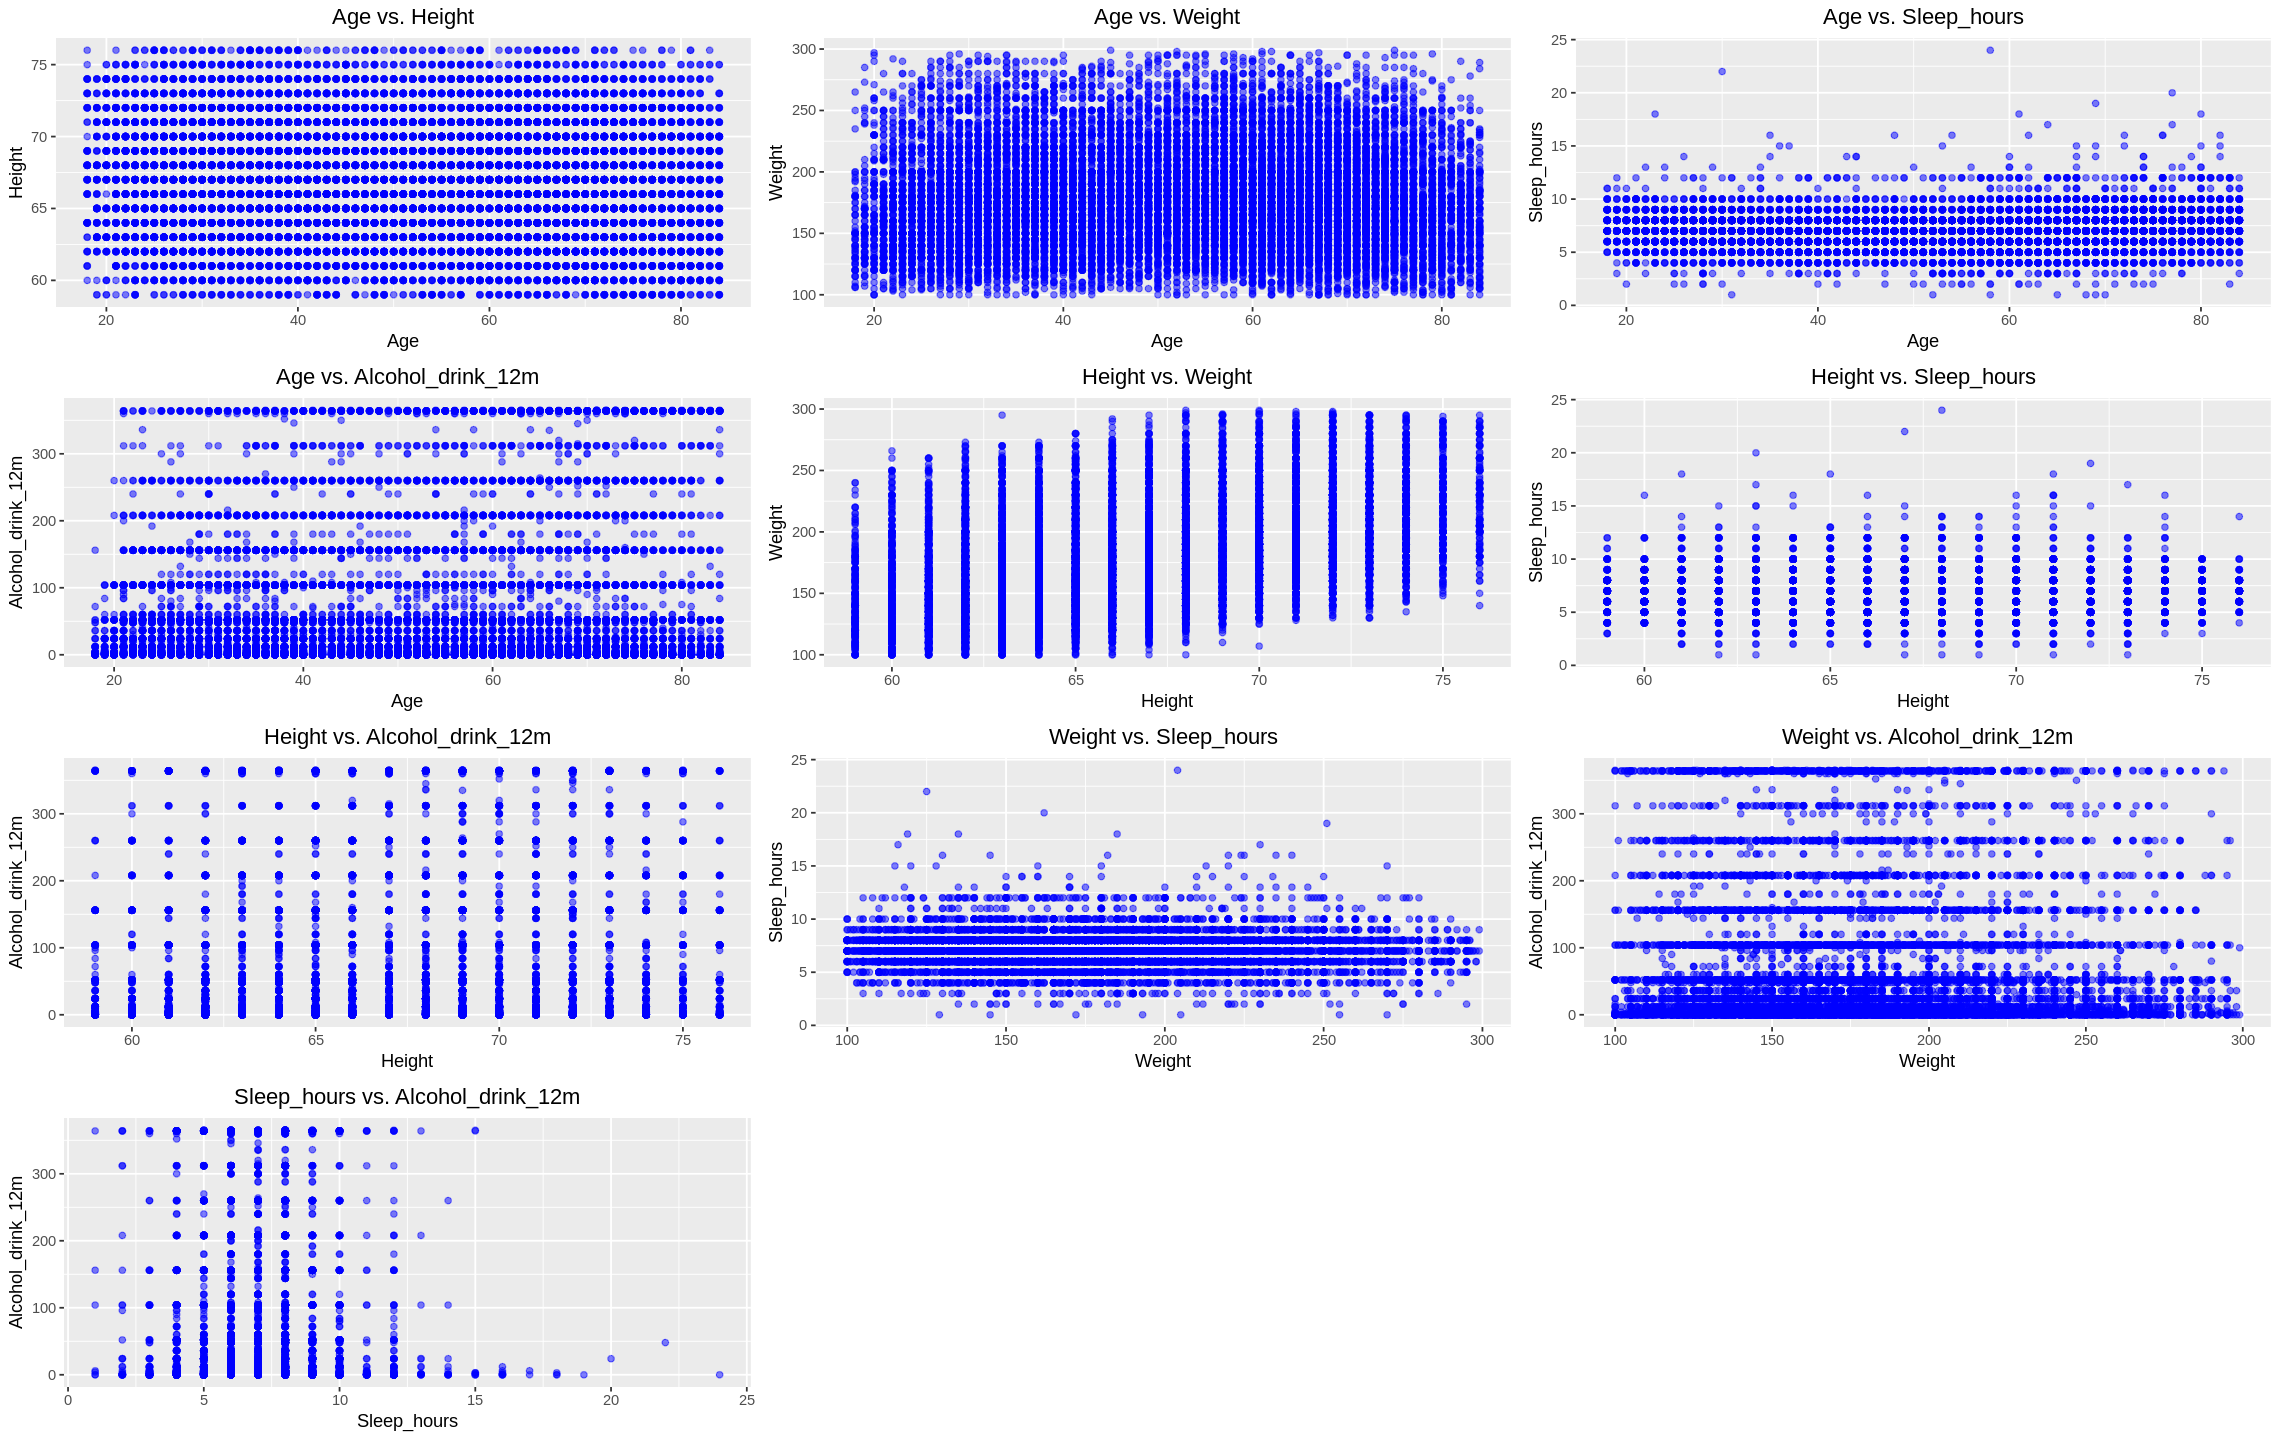

In [66]:
options(repr.plot.width = 19, repr.plot.height = 12)

# Function to create a scatter plot for two given columns
plot_scatter <- function(data, col1, col2) {
  ggplot(data, aes(x = .data[[col1]], y = .data[[col2]])) +
    geom_point(alpha = 0.5, color = "blue") +  # Scatterplot with points
    labs(title = paste(col1, "vs.", col2), x = col1, y = col2) +
    theme(plot.title = element_text(hjust = 0.5)) # Center title
}

# Create a list of all column combinations
col_combinations <- combn(num_cols, 2, simplify = FALSE)

# Create a list of scatter plots using lapply
scatter_plots <- lapply(col_combinations, function(cols) {
  plot_scatter(df, cols[1], cols[2])
})

# Arrange plots in a grid
grid.arrange(grobs = scatter_plots, ncol = 3)

There appears to be a positive correlation between height and weight, though it is relatively weak. Most of the other scatterplots do not show any noticeable indication of a relationship (which makes sense given the close to zero coefficients for the others).

#### Categorical Variables

**Contingency Table**

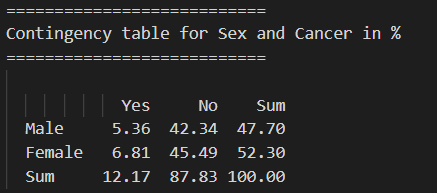

The above image is a semi-Contingency table. This allows us to visualize the frequency distribution of two or more categorical variables. In general, the values typically represent counts, but I have added proportions and margins for clarity and personal preference. In the context of this project, the table portrays the frequency distribution of the Sex and Cancer variables.

5.36% of the sampled adults are male and have been told they have cancer.

6.81% of the sampled adults are female and have been told they have cancer.

42.34% of the sampled adults are male and have not been told they have cancer.

45.49% of the sampled adults are female and have not been told they have cancer.



---



A good portion of the code below was initially written with the help of Claude. Originally, I was simply printing all 36 contingency tables directly in the notebook. However, I realized that doing so would require a significant amount of scrolling and could potentially overwhelm anyone viewing the notebook.

My next plan was to export each table as a CSV file to a folder and then import them into either Google Sheets or Microsoft Excel to improve their appearance. Unfortunately, I no longer have access to Microsoft 365, so I can't use Power Query. Google Sheets doesn't have any built-in features or extensions that make this easy either—I tried using Sheetgo, but it didn’t retrieve the CSV filenames as expected.

After consulting with Claude, it initially suggested creating an HTML page to display the tables. However, it also proposed saving everything into a single text file, which I thought was a better solution.

In [51]:
# Creating the output file
txt_output <- "contingency_tables_report.txt"
# Creating connection to output file
fileConn <- file(txt_output)
# Open file connection in writing mode
open(fileConn, "w")

# Loop to iterate through all columns except the last one
for (i in 1:(length(cat_cols)-1)) {
  # Grabbing the ith column
  col1 <- cat_cols[i]

  # Loop to iterate through all columns that come after the current column
  for (j in (i+1):length(cat_cols)) {
    # Grabbing the jth column
    col2 <- cat_cols[j]

    # Adding Section Headers
    writeLines(paste("\n\n==========================="), fileConn)
    writeLines(paste("Contingency table for", col1, "and", col2, 'in %'), fileConn)
    writeLines(paste("==========================="), fileConn)

    # Creating contingency table, ct, with the col1 and col2 columns
    ct <- table(df_copy[[col1]], df_copy[[col2]])
    # Creating a proportion table based on ct, convert to percentages, and round to three decimal places
    pt <- round(prop.table(ct) * 100, 2)
    # Add proportions to the contingency table.
    ad <- addmargins(pt)

    # Captures output of ad.
    output <- capture.output(print(ad))
    # Send output to the file
    writeLines(output, fileConn)
  }
}

# Close the file connection.
close(fileConn)
# Print message to say tables have been saved.
cat("All tables saved to", txt_output, "\n")

All tables saved to contingency_tables_report.txt 


The text file contains 36 contingency tables. Below are the main highlights:

* Females show slightly higher rates of being told they have depression and cancer compared to males.

* Males are more likely to have smoked 100 cigarettes.

* Males outpace females in education levels ranging from 1st–11th grade through high school (and professional degrees), while females outpace males from "some college" through master's degrees.

* Individuals who meet both aerobic and strength exercise guidelines exhibit lower rates of daily anxiety compared to those meeting neither guideline.

* The South region generally shows higher rates of anxiety and a greater proportion of individuals meeting neither exercise guideline.

* There is minimal occurrence of individuals having both cancer and coronary heart disease.

* High school and higher education levels are more commonly associated with individuals who have not smoked 100 cigarettes, compared to those who have.

These observations reflect trends within the dataset and are not necessarily generalizable truths. It's also possible that some of the observed patterns are due to chance. For example, since the South region is the most represented, it makes sense that it would also have the highest raw counts for certain conditions like anxiety. Statistical tests could be performed to determine whether these associations are significant.

**Chi-Square Tests**

Next up is performing a chi-square test for each combination of categorical variables. A chi-square test, in simple terms, tests whether there is a relationship between two categorical variables [1]. For this test, we must first specify a null and alternate hypothesis:  
* H<sub>0</sub>: No relationship exists between the two categorical variables (null)  
* H<sub>a</sub>: A relationship exists between the two categorical variables (alternate)

If the p-value is below a certain threshold (usually 0.05), we have sufficient evidence to reject the null hypothesis in favor of the alternate hypothesis. For this test to be reliable, we would need to check the assumptions for a chi-square test. However, since this is part of exploratory data analysis, I won’t address them here.



In [64]:
null_not_rejected <- 0

# Loop to iterate through all columns except the last one
for (i in 1:(length(cat_cols)-1)) {
  # Grabbing the ith column
  col1 <- cat_cols[i]
  # Loop to iterate through all columns that come after the current column
  for (j in (i+1):length(cat_cols)) {
    # Grabbing the jth column
    col2 <- cat_cols[j]
    # Creating contingency table, ct, with the col1 and col2 columns
    ct <- table(df_copy[[col1]], df_copy[[col2]])

    # Running a chi-square test on ct
    c_test <- chisq.test(ct)
    # Extracting the p-value from the chi-square test
    p_val <- c_test$p.value

    # If statement that checks if the p-value is greater than 0.05
    if (p_val > 0.05) {
      # If the p-value is greater than 0.05, it will print the p-value, and names of both features.
      cat('p-value is', p_val, 'for the contingency table for the', col1, 'and', col2,'variables\n')
      null_not_rejected <- null_not_rejected + 1
    }
  }
}

cat('There were', null_not_rejected,'null hypotheses that were not rejected.')

There were 0 null hypothesess that were not rejected.

Since none of the null hypotheses were retained, this means we rejected the null hypothesis in favor of the alternative hypothesis for all 36 chi-square tests. What this suggests is that for every combination of two categorical variables, there appears to be a relationship between them.

One thing to consider in the future is that, since we performed 36 tests, there is a greater chance of making at least one false positive (incorrectly rejecting the null hypothesis when it is actually true) [2]. However, we could account for this by dividing the normal p-value (0.05) by the number of tests performed (36), using the Bonferroni correction [2]. We would then use this adjusted value to determine whether we have sufficient evidence to reject the null hypothesis.

# References

[1] 11.3 - Chi-Square Test of Independence. (n.d.). https://online.stat.psu.edu/stat200/book/export/html/230

[2] Unknown, U. (n.d.). Lecture 10: Multiple testing. https://www.gs.washington.edu/academics/courses/akey/56008/lecture/lecture10.pdf